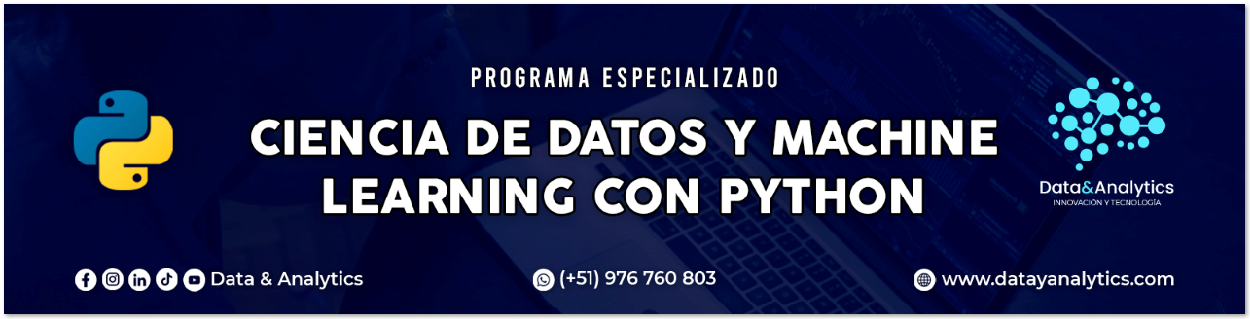

#DATA & ANALYTICS



----------------------------
Análisis de Series de Tiempo

Instructor: Angelo Jonathan Diaz Soto

E-mail: angelo.diaz@imca.edu.pe

Web: www.datayanalytics.com

# Contenido
1. **Introducción**
2. **Métricas de evaluación de Modelo**
3. **Metodos de suavizamiento**
4. **Modelo Arima**
5. **Modelo Gradiente Boosting con XGBoost**

# 1. Introducción
Una Serie de tiempo es una colección de puntos de datos que se almacenan con respecto a
su tiempo. Análisis matemático y estadístico realizado en este tipo de datos para encontrar patrones ocultos e información significativa se llama análisis serie de tiempo. Las técnicas de modelado de series de tiempo se utilizan para comprender patrones pasados a partir de los datos e intentar pronosticar horizontes futuros. Estas Las técnicas y metodologías han ido evolucionando durante décadas.

Observaciones con marcas de tiempo continuas y variables objetivo a veces se enmarcan como problemas de regresión sencillos por descomposición de fechas en minutos, horas, días, semanas, meses, años y etc., que no es la forma correcta de manejar dichos datos porque los resultados obtenidos son pobres.

Existen diferentes tipos de datos, como estructurados, semiestructurados, y no estructurado, y cada tipo debe manejarse a su manera para ganar intuición máxima. En este cuaderno, vamos a estar viendo series de tiempo con datos que están estructurados de manera tal, como datos del mercado de valores, clima, tasas de natalidad, tráfico, aplicaciones para compartir bicicletas, etc.


## 1.1 **¿Qué es una Serie de Tiempo?**

Una serie de tiempo es una secuencia de datos u observaciones, medidos en determinados momentos y ordenados cronológicamente. Visualmente, es una curva que evoluciona en el tiempo. Una serie de tiempo es un conjunto de observaciones sobre los valores que toma una variable (cuantitativa) a través del tiempo.

**Ejemplo de algunas aplicaciones de datos de serie temporal**

1. Anual: - PIB, serie macroeconómica
2. Trimestral:- Ingresos de una empresa.
3. Mensual: - Ventas, gastos, salario
4. Semanal:- Demanda, Precio de Gasolina y Diesel
5. Diariamente:- Precio de cierre de acciones, valor sensex, transacción diaria de cajero automático
6. Por hora: - AAQI

El análisis de series de tiempo puede ser útil para ver cómo cambia un activo, un valor o una variable económica dados con el tiempo. También se puede utilizar para examinar cómo los cambios asociados con el punto de datos elegido se comparan con los cambios en otras variables durante el mismo período de tiempo.


## 1.2 Características de la serie de tiempo
Una serie temporal es una colección de puntos de datos que se almacenan con respecto a su tiempo. El análisis matemático y estadístico realizado en este tipo de datos para encontrar patrones ocultos e información significativa se denomina análisis de series temporales. Las técnicas de modelado de series temporales se utilizan para comprender patrones pasados ​​a partir de los datos y tratar de pronosticar horizontes futuros. Estas técnicas y metodologías han ido evolucionando durante décadas.

Las observaciones con marcas de tiempo continuas y variables objetivo a veces se enmarcan como problemas de regresión sencillos al descomponer las fechas en minutos, horas, días, semanas, meses, años, etc., que no es la forma correcta de manejar dichos datos porque los resultados obtenidos son deficientes. . En este capítulo, aprenderá el enfoque correcto para manejar datos de series de tiempo.

Hay diferentes tipos de datos, como estructurados, semiestructurados y no estructurados, y cada tipo debe manejarse a su manera para obtener el máximo conocimiento. En este libro, vamos a ver datos de series de tiempo que están estructurados de manera tal como datos del mercado de valores, clima, tasas de natalidad, tráfico, aplicaciones para compartir bicicletas, etc.

# 2. Evaluación de Modelos

Al desarrollar modelos de aprendizaje automático, generalmente comparamos varios modelos durante la fase de construcción. Luego, estimamos los rendimientos de esos modelos y se selecciona el modelo que considera que tiene más probabilidades de funcionar bien. Necesitamos medidas objetivas de desempeño para poder decidir qué pronóstico conservar como su pronóstico real. A lo largo de este cuaderno, vamos a usar numerosas herramientas para la evaluación de modelos. Veremos diferentes estrategias para evaluar modelos de aprendizaje automático en general y adaptaciones y consideraciones específicas a tener en cuenta para la previsión. También verá diferentes métricas para calificar el rendimiento del modelo.

## 2.1 Métricas evaluar modelo
Este error mes a mes es información útil para la mejora del modelo. Sin embargo, aunque da una primera impresión de la calidad del modelo, existen algunos problemas con esta forma de evaluación del modelo. En primer lugar, este nivel de detalle sería demasiado para hacer una comparación de modelos: no puede mirar largas listas de errores para cada modelo, pero lo ideal es que desee uno o algunos KPI por modelo.

En segundo lugar, debe tener en cuenta que simplemente no es posible tomar el promedio de esta columna de error y considerarlo como su métrica de error. Dado que hay medidas de error positivas y negativas, se promediarían entre sí. Esto sería una fuerte subestimación de su error.

Para resolver este problema, debe estandarizar los errores tomando los valores absolutos o elevando al cuadrado los errores. Esto asegurará que un error negativo y uno positivo no se anulen entre sí. Ahora verá cinco métricas comunes que hacen exactamente esto.

### 2.1.1 Métrica 1: MSE
El error cuadrático medio (MSE) es una de las métricas más utilizadas en el aprendizaje automático. Se calcula como el promedio de los errores al cuadrado. Para calcular el MSE, toma los errores por fila de datos, eleva al cuadrado esos errores y luego toma el promedio de ellos.

$$MSE=\frac{1}{n}\sum(y_i-\hat y_i)^2 $$

La métrica de error MSE es excelente para comparar diferentes modelos en el mismo conjunto de datos. La escala del MSE será la misma para cada modelo aplicado al mismo conjunto de datos. Sin embargo, la escala de la métrica no es muy intuitiva, lo que dificulta su interpretación fuera de la evaluación comparativa de múltiples modelos.

### 2.1.2 Métrica 2: RMSE
El RMSE, o raíz del error cuadrático medio, es la raíz cuadrada del error cuadrático medio. Como puede comprender, sacar la raíz cuadrada del MSE no hace ninguna diferencia cuando desea utilizar las métricas de error para clasificar los rendimientos en orden.

$$RSME=\sqrt{MSE} $$

Sin embargo, hay una ventaja en usar el RMSE en lugar del MSE. La razón para sacar la raíz cuadrada del MSE es que la escala del RMSE es la misma que la escala de la variable original. En la fórmula MSE, se toma el promedio de los errores al cuadrado. Esto hace que el valor sea difícil de interpretar. El uso de la raíz cuadrada hará que la escala de la métrica de error vuelva a la escala de sus valores reales.

### 2.1.3 Métrica 3: MAE
El error absoluto medio (MAE) se calcula tomando las diferencias absolutas entre los valores pronosticados y reales por fila. El promedio de esos errores absolutos es el error absoluto medio.

$$MAE=\frac{1}{n} \sum|y_i-\hat y_i| $$

El MAE toma los valores absolutos de los errores antes de promediarlos. Tomar el promedio de los errores absolutos es una forma de asegurarse de que la suma de los errores no haga que se cancelen entre sí.

Has visto que el MSE usa el cuadrado de los errores para evitar esto, y el MAE es una alternativa a esto. El MAE tiene una fórmula más intuitiva: es la métrica de error que la mayoría de la gente encuentra intuitivamente. Sin embargo, el RMSE es generalmente favorecido sobre el MAE.

### 2.1.4 Métrica 4: MAPE
El MAPE, abreviatura de Error porcentual absoluto medio, se calcula tomando el error de cada predicción, dividido por el valor real. Esto se hace para obtener los errores relativos a los valores reales. Esto hará que la medida del error sea un porcentaje y, por lo tanto, está estandarizado.

Como hemos entendido de las medidas de error anteriores, no se estandarizaron en una escala entre cero y uno. Sin embargo, esta estandarización es muy útil. Esto facilita la comunicación de los resultados de rendimiento.

Para calcular el MAPE, toma los valores absolutos de esos porcentajes por fila y calcula su promedio.

$$MAPE=\frac{1}{n}\sum|\frac{y_i-\hat y_i}{y_i}| $$

El MAPE mide un porcentaje de error. Es una medida de error, por lo que los valores más bajos para el MAPE son mejores. Sin embargo, puede convertir fácilmente el MAPE en una medida de bondad de ajuste calculando 1 – MAPE. En muchos casos, es más fácil comunicar el desempeño en términos de un resultado positivo que negativo.

### 2.1.5 Métrica 5: R2
La métrica R2 (R cuadrado) es una métrica que está muy cerca de la métrica 1 - MAPE. Es una métrica de rendimiento en lugar de una métrica de error, lo que la hace ideal para estimar el rendimiento de nuestro modelo.

El R2 es un valor que tiende a estar entre 0 y 1, siendo 0 malo y 1 perfecto. Por lo tanto, se puede usar fácilmente como un porcentaje multiplicándolo por 100. El único caso en el que el R2 puede ser negativo es si su pronóstico es más del 100 % incorrecto.

$$R^2=1-\frac{\sum(y_i -\hat y_i)^2 }{\sum (y_i -\bar y_i )^2} $$

La fórmula hace un cálculo interesante. Calcula una relación entre la suma de los errores al cuadrado y la suma de las desviaciones entre el pronóstico y el promedio. Esto se reduce a un porcentaje de aumento de su modelo sobre el uso del promedio como modelo. Si su modelo es una predicción tan mala como usar el promedio, entonces el R2 será cero. Como el promedio se usa a menudo como modelo de referencia, esta es una métrica de rendimiento muy práctica.

**Creamos un diccionario en donde podamos encontrar cada una de las métricas**

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

# 3. Método de Suavizamiento (smoothing)

## 3.1 Media móvil simple
Una tendencia es un patrón, que muestra el movimiento de los datos con respecto al tiempo. Se puede medir utilizando el Método Gráfico a Mano Alzada, Método de puntos seleccionados, Método de semi-promedios, Método de medias móviles, Método de Mínimos Cuadrados.

El método de la media móvil se basa en el principio de que el efecto total de las variaciones periódicas en diferentes puntos de tiempo neutraliza por completo. Utiliza el promedio de una serie de puntos o períodos de datos adyacentes, el promedio se calcula mediante observaciones superpuestas y destaca las tendencias a largo plazo en las series temporales mientras captura las fluctuaciones a corto plazo. El modelo de predicción de series temporales como ARIMA utiliza la media móvil para la predicción.

SMA es la media no ponderada de los $k$ puntos de datos anteriores. Si $p_1, p_2..., p_n$ son el punto de datos de la serie temporal y la media sobre los últimos $k$ puntos de datos se denota como $SMA_k$, entonces se puede calcular como:

$$SMA_k=\frac{p_{n-k+1}+p_{n-k+2}+\cdots+p_n }{k} $$

$$=\frac{1}{n}\sum_{i=n-k+1}^{n}p_i $$

In [ ]:
!pip install yfinance

In [ ]:
# Manipulación y tratamiento de Datos
import pandas as pd
import numpy as np

# Visualización de Datos
import  matplotlib.pyplot  as  plt

# Modelación
from sklearn import metrics
from statsmodels.tsa.api import SimpleExpSmoothing
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

from timeit import default_timer as timer

# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Descargar datos de yahoo
import yfinance as yf

In [ ]:
# Configure las horas de finalización y de inicio para la captura de datos
from datetime import datetime
end = datetime.now()# a la fecha de hoy
start = datetime(end.year - 5, end.month, end.day)

df = yf.download("MSFT",
                      start, end, progress=False)


df.head()
# Guardamos la data
#df.to_csv("fb.csv")

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-29,160.727829,161.406940,158.480097,160.536535,34754500
2020-01-30,165.261551,166.476291,163.358140,166.476291,51597500
2020-01-31,162.822540,164.898112,162.200830,164.716392,36142700
2020-02-03,166.791962,166.906735,162.985139,163.013832,30107000
2020-02-04,172.282135,172.779511,168.637928,169.431813,36433300


In [ ]:
df.head(10)

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-29,160.727829,161.406940,158.480097,160.536535,34754500
2020-01-30,165.261551,166.476291,163.358140,166.476291,51597500
2020-01-31,162.822540,164.898112,162.200830,164.716392,36142700
2020-02-03,166.791962,166.906735,162.985139,163.013832,30107000
2020-02-04,172.282135,172.779511,168.637928,169.431813,36433300
2020-02-05,172.071716,176.184606,170.646562,176.022006,39186300
2020-02-06,175.639450,175.821185,172.224790,173.095195,27751400
2020-02-07,175.888092,177.552382,174.539444,174.893354,33529100


In [ ]:
df.shape

(1258, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-29 to 2025-01-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   1258 non-null   float64
 1   (High, MSFT)    1258 non-null   float64
 2   (Low, MSFT)     1258 non-null   float64
 3   (Open, MSFT)    1258 non-null   float64
 4   (Volume, MSFT)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
#df = pd.read_csv("fb.csv")[["Date","Close"]]
data= df[["Close"]]
# Covertimos la fecha a un formato de tiempo
#df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

#df = df.set_index("Date")

data.head()

Price,Close
Ticker,MSFT
Date,
2020-01-29,160.727829
2020-01-30,165.261551
2020-01-31,162.822540
2020-02-03,166.791962
2020-02-04,172.282135


In [ ]:
data.iloc[:-30]

Price,Close
Ticker,MSFT
Date,
2020-01-29,160.727829
2020-01-30,165.261551
2020-01-31,162.822540
2020-02-03,166.791962
2020-02-04,172.282135
...,...
2024-12-06,443.570007
2024-12-09,446.019989


In [ ]:
train = data.iloc[:-30]
test = data.iloc[-30:]

start = len(train)
end = start + len(test) - 1

In [ ]:
print("Datos originales", df.shape)
print("Datos de entrenamiento", train.shape)
print("Datos de prueba, últimos 30 días", test.shape)
print("Datos de inicio", start)
print("Datos de final",end)

Datos originales (1258, 5)
Datos de entrenamiento (1228, 1)
Datos de prueba, últimos 30 días (30, 1)
Datos de inicio 1228
Datos de final 1257


A função dataframe.rolling() do Pandas fornece a funcionalidade de cálculos de janela móvel. O conceito de cálculo de janela móvel é usado principalmente no processamento de sinais e dados de séries temporais. Em poucas palavras, pegamos um tamanho de janela de k por vez e realizamos alguma operação matemática desejada sobre ele. Uma janela de tamanho k significa k valores consecutivos por vez. Em um caso muito simples, todos os valores 'k' têm o mesmo peso.
`

In [ ]:
df1=data.copy()

In [ ]:
df1.head()

Price,Close
Ticker,MSFT
Date,
2020-01-29,160.727829
2020-01-30,165.261551
2020-01-31,162.822540
2020-02-03,166.791962
2020-02-04,172.282135


In [ ]:
df1["5_SMA"] = df1["Close"].rolling(window = 5).mean()
df1["10_SMA"] = df1["Close"].rolling(window = 10).mean()
df1["15_SMA"] = df1["Close"].rolling(window = 15).mean()

In [ ]:
df1.head(15)

Price,Close,5_SMA,10_SMA,15_SMA
Ticker,MSFT,,,
Date,,,,
2020-01-29,160.727829,NaN,NaN,NaN
2020-01-30,165.261551,NaN,NaN,NaN
2020-01-31,162.822540,NaN,NaN,NaN
2020-02-03,166.791962,NaN,NaN,NaN
2020-02-04,172.282135,165.577203,NaN,NaN
2020-02-05,172.071716,167.845981,NaN,NaN
2020-02-06,175.639450,169.921561,NaN,NaN
2020-02-07,175.888092,172.534671,NaN,NaN


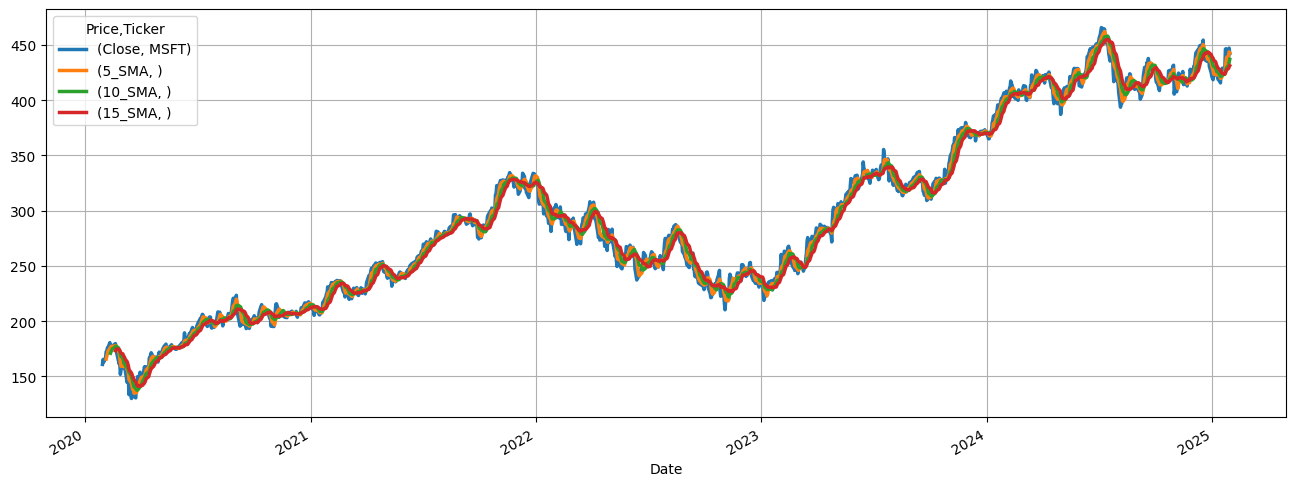

In [ ]:
df1.plot(figsize = (16,6), grid = True,lw=2.5);

## 3.2 Suavizado exponencial simple
El suavizado exponencial simple (SES) es uno de los modelos mínimos del algoritmo de suavizado exponencial. Tales técnicas se emplean para una observación univariante (datos), que no tiene una tendencia clara o patrones estacionales. Se trata de un parámetro llamado alfa, que es el parámetro de suavizado. La idea central es emplear un promedio móvil ponderado, que incluye ponderaciones decrecientes exponencialmente, que asignan una mayor ponderación a la observación más reciente. El concepto detrás de SES es pronosticar valores futuros utilizando un promedio ponderado de todos los valores anteriores de la serie. Este método se puede utilizar para predecir series que no tienen tendencias ni estacionalidad.

la ecuación matemática nos ayuda a representar el siguiente modelo:
$$L_t = \alpha Y_t + (1-\alpha) L_{t-1}$$

Aquí, el valor del modelo es un promedio ponderado entre el valor real actual y los valores del modelo anterior. El peso $\alpha$ se denomina factor de suavizado. Define qué tan rápido "olvidaremos" la última observación verdadera. Cuanto menor sea $\alpha$, mayor será la influencia de las observaciones anteriores y más suave será la serie.

La exponencialidad está oculta en la recursividad de la función: multiplicamos por $(1-\alpha)$ cada paso, que ya contiene una multiplicación por $(1-\alpha)$ de los valores anteriores del modelo.

El siguiente fragmento se usa para encontrar el mejor parámetro de suavizado, que varía de 0 a 1. El modelo de nivel de suavizado se ajustará y sus resultados se capturarán en temp_df. Los siguientes resultados muestran que 1.0 da el menor **RMSE**.

El parámetro `SimpleExpSmoothing()` se importó del paquete `Statsmodels`. Aquí lo estamos usando para entrenar los datos. Los datos de entrenamiento se convierten en una matriz NumPy.

In [ ]:
resu = []
SP, Rmse = [], []
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:# son los valores de alpha
    print(f'Valor de Alpha para el suavizamiento= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    SP.append(i)
    Rmse.append(rmse)
temp_df = pd.DataFrame({'smoothing parameter':SP, 'RMSE':Rmse})
temp_df.sort_values(by=['RMSE']).head(3)

Valor de Alpha para el suavizamiento= 0
Evaluation metric results:-
MSE is : 74283.81993074631
MAE is : 272.3351694742839
RMSE is : 272.5505823342638
MAPE is : 62.86267729056269
R2 is : -631.873848315755

Valor de Alpha para el suavizamiento= 0.1
Evaluation metric results:-
MSE is : 118.45423293211665
MAE is : 9.476332600911459
RMSE is : 10.883668174476686
MAPE is : 2.1910152261583957
R2 is : -0.009191319387313657

Valor de Alpha para el suavizamiento= 0.2
Evaluation metric results:-
MSE is : 188.04612607760677
MAE is : 11.610807181530182
RMSE is : 13.712991142621174
MAPE is : 2.7173193066190198
R2 is : -0.6020914861749891

Valor de Alpha para el suavizamiento= 0.3
Evaluation metric results:-
MSE is : 261.1790784394418
MAE is : 13.531890463262377
RMSE is : 16.1610358096083
MAPE is : 3.174375744420533
R2 is : -1.2251603192408864

Valor de Alpha para el suavizamiento= 0.4
Evaluation metric results:-
MSE is : 307.8752688749442
MAE is : 14.672790322701148
RMSE is : 17.546374807205737
MAPE 

,smoothing parameter,RMSE
1,0.1,10.883668
2,0.2,13.712991
3,0.3,16.161036


Como se puede observar hemos obtenido los tres mejores resultado para cada unos de los $\alpha$. Con cada uno de esto tres valores a entrenarlos para cada modelo

In [ ]:
ses01 = SimpleExpSmoothing(df1["Close"]).fit(smoothing_level = 0.4, optimized = False)
df1["ses04"] = ses01.fittedvalues.shift(-1)

ses08 = SimpleExpSmoothing(df1["Close"]).fit(smoothing_level = 0.5, optimized = False)
df1["ses05"] = ses08.fittedvalues.shift(-1)

ses09 = SimpleExpSmoothing(df1["Close"]).fit(smoothing_level = 0.6, optimized = False)
df1["ses06"] = ses09.fittedvalues.shift(-1)

In [ ]:
df1.head(15)

Price,Close,5_SMA,10_SMA,15_SMA,ses04,ses05,ses06
Ticker,MSFT,,,,,,
Date,,,,,,,
2020-01-29,160.727829,NaN,NaN,NaN,160.727829,160.727829,160.727829
2020-01-30,165.261551,NaN,NaN,NaN,162.541318,162.994690,163.448062
2020-01-31,162.822540,NaN,NaN,NaN,162.653807,162.908615,163.072749
2020-02-03,166.791962,NaN,NaN,NaN,164.309069,164.850288,165.304277
2020-02-04,172.282135,165.577203,NaN,NaN,167.498295,168.566212,169.490992
2020-02-05,172.071716,167.845981,NaN,NaN,169.327664,170.318964,171.039426
2020-02-06,175.639450,169.921561,NaN,NaN,171.852378,172.979207,173.799441
2020-02-07,175.888092,172.534671,NaN,NaN,173.466664,174.433650,175.052631


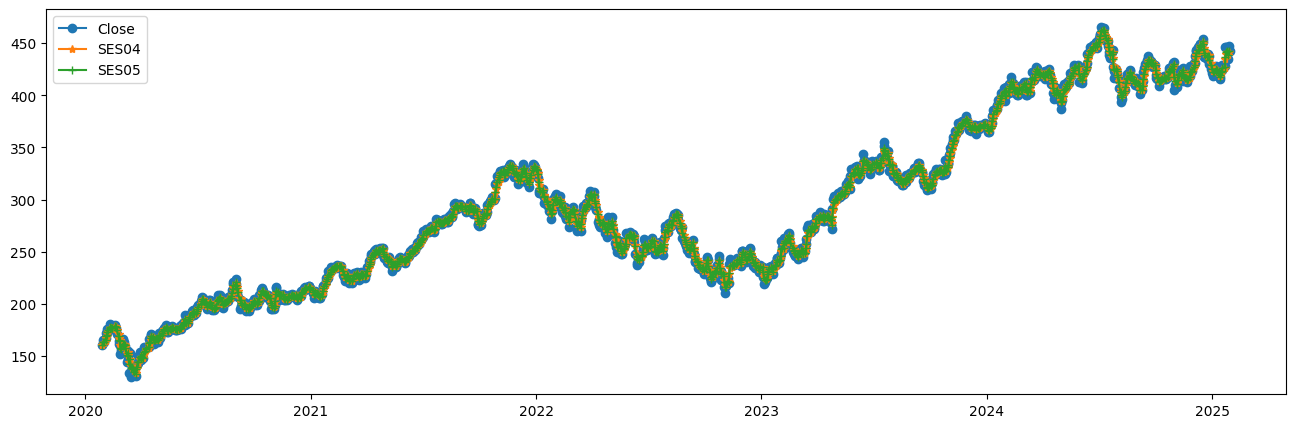

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,5]
plt.plot( df1["Close"], label='Close',marker="o")
plt.plot(df1["ses04"], label='SES04',marker="*")
plt.plot(df1["ses05"], label="SES05",marker="+")
plt.legend(loc='best')
plt.show()

Podemos ver claramente que el suavizado exponencial simple para los diferentes valores de $\alpha$.

## 3.3 Doble Suavizamiento exponencial
Hasta ahora, el métodos presentados han sido para un solo pronóstico de un punto futuro (con un buen suavizado). Eso está bien, pero tampoco es suficiente. Ampliemos el suavizado exponencial para que podamos predecir dos puntos futuros (y, por supuesto, también incluiremos más suavizado).

La descomposición de series nos ayudará a obtener dos componentes: intercepto (nivel) $L_t$ y pendiente (tendencia) $T_t$. Aprendimos a predecir el intercepto (o el valor esperado de la serie) con nuestros métodos anteriores; ahora, aplicaremos el mismo suavizado exponencial a la tendencia, asumiendo que la dirección futura de los cambios en la serie de tiempo depende de los cambios ponderados previos.
Pronóstico = nivel estimado + tendencia en el momento más reciente:

Aquí está la ecuación actualizada para el nivel:
$$L_t = \alpha Y_t + (1-\alpha) (L_{t-1} + T_{t-1})$$

Aquí está la ecuación actualizada para las tendencias:
$$T_t = \beta (L_t-L_{t-1}) + (1-\beta) T_{t-1}$$

Aquí está la tendencia aditiva:

Pronóstico = nivel de estimación más reciente + tendencia de estimación.
$$F_{t+k} =L_t + KT_t$$

Aquí está la tendencia multiplicativa:

Pronóstico = nivel de estimación más reciente + tendencia de estimación.
$$F_{t+k} =L_t \times (T_t)^K$$

Amortiguación significa disminuir las tendencias de tiempo futuro en línea recta (sin tendencia). Las predicciones generadas por el método lineal de Holt muestran una tendencia constante (creciente o decreciente) en el futuro.


Primero vamos a definir un rango de parámetros para **smoothing_level**, **smoothing_slope**, **damping_slope** y **damped**, y luego estamos tratando de encontrar la mejor combinación posible que produzca al menos RMSE y R2.

In [ ]:
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

Verifiquemos si el suavizado exponencial doble es capaz de encontrar los mejores parámetros por sí mismo ajustando algunas configuraciones, de la siguiente manera:

Aquí están los parámetros de Holt:

* **endog (array-like):** Time series
* **exponential (bool, optional):** Tipo de componente de tendencia
* **damped (bool, optional):** Si el componente de tendencia debe ser amortiguado

Estos son los parámetros de ajuste:
* **smoothing_level (float, optional):** Este es el valor alfa del suavizado exponencial simple. Si se establece el valor, esta configuración se utilizará como valor.
* **smoothing_slope (float, optional):** Este es el valor beta del método de tendencia de Holt. Si se establece el valor, esta configuración se utilizará como valor.
* **damping_slope (float, optional):** Este es el valor de phi del método amortiguado. Si se establece el valor, esta configuración se utilizará como valor.
* **Optimized (bool, optional):** Esto especifica si los valores que no se han establecido se optimizarán automáticamente.

In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    #print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    #print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    #print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    nueva_fila = pd.DataFrame({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, index=[0])
    df_results_moni = pd.concat([df_results_moni,nueva_fila], ignore_index=True)
end = timer()
#print(f'Tiempo total necesario para completar la búsqueda de cuadrícula en segundos : {(end - start)}')


In [ ]:
print(f' El mejor parámetro selecionado que un menos RMSE y r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)


 El mejor parámetro selecionado que un menos RMSE y r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
0,0.1,0.1,0.1,True,10.895318,-0.011353


In [ ]:
fit1 = Holt(df["Close"],damped =False).fit(smoothing_level=0.4, smoothing_slope=0.8, damping_slope = 0.1 ,optimized=False)
fcast1 = fit1.forecast(5)


In [ ]:
fit1.summary()

Dep. Variable:,MSFT,No. Observations:,1258
Model:,Holt,SSE,48302.582
Optimized:,False,AIC,4597.136
Trend:,Additive,BIC,4617.685
Seasonal:,None,AICC,4597.203
Seasonal Periods:,None,Date:,"Wed, 29 Jan 2025"
Box-Cox:,False,Time:,22:52:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4000000,alpha,False
smoothing_trend,0.8000000,beta,False


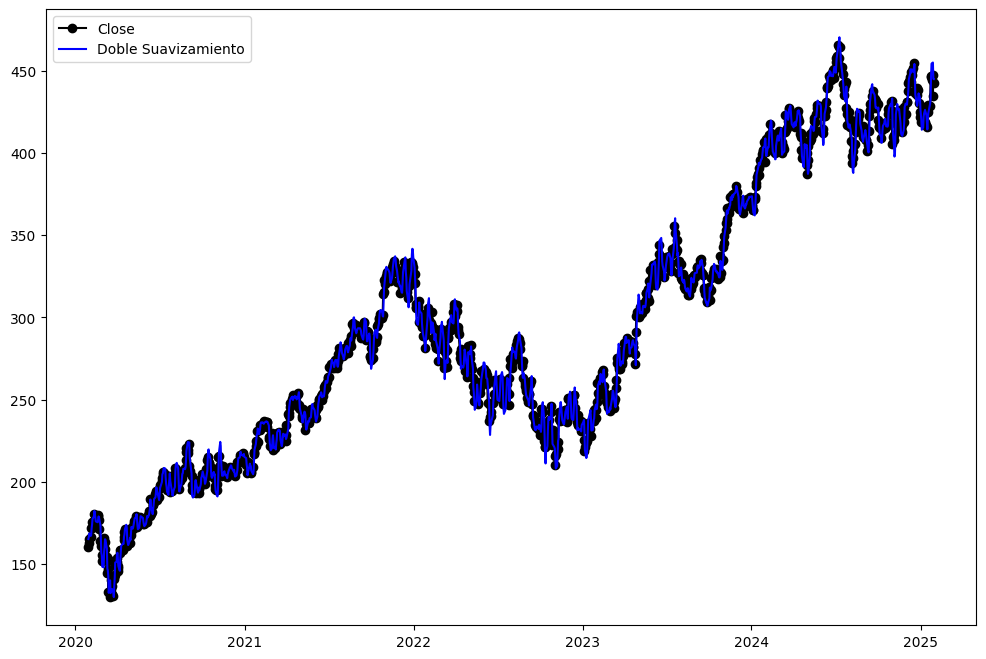

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df1["Close"], marker="o", color="black", label="Close")
plt.plot(fit1.fittedvalues, color="blue", label="Doble Suavizamiento")
plt.legend(loc='best')
plt.show();

Gráfico de líneas que representa la comparación de resultados entre diferentes configuraciones de doble suavizado exponencial

A partir de las métricas y el gráfico de evaluación, podemos ver que el suavizado exponencial doble se desempeñó significativamente mejor que el suavizado exponencial simple.


# 6. Modelo Arima
Un modelo Arima, significa **promedio movil(MA) integrado(I) autorregresivo(AR)**, es un modelo estadístico que utiliza datos de series de tiempo para comprender mejor el conjunto de datos o para predecir tendencias futuras. Es una forma de análisis de regresión que mide la fuerza de una variable dependiente en relación a otra variable cambiante.

## 6.1 Introducción a los modelos ARIMA
Entonces, ¿qué es exactamente un modelo ARIMA?

ARIMA, su abreviatura significa **Autorregresivo(AR) integrada(I) Media móvil(MA)** es en realidad una clase de modelos que 'explica' una serie de tiempo determinada en función de sus propios valores pasados, es decir, sus propios retrasos y los errores de pronóstico retrasados, de modo que se puede utilizar la ecuación para pronosticar valores futuros.

Cualquier serie de tiempo **"no estacional"** que muestre patrones y no sea un **"ruido blanco"** aleatorio se puede modelar con modelos ARIMA.

Un modelo ARIMA se caracteriza por 3 términos: p, d, q

dónde,

* p: es el orden del término AR

* q: es el orden del término MA

* d: es el número de diferenciaciones necesarias para que la serie de tiempo sea estacionaria

## 6.2 Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA
El propósito de diferenciarlo para hacer estacionaria la serie de tiempo.

Pero debe tener cuidado de no diferenciar demasiado la serie. Porque, una serie sobrediferenciada aún puede ser estacionaria, lo que a su vez afectará los parámetros del modelo.

Entonces, ¿cómo determinar el orden correcto de diferenciación?

Para determinar el orden de diferenciación lo hacemos diferenciando la nuestra serie de datos hasta que la serie se vuelva estacionaria.

## 6.3 Cómo encontrar el orden del término AR (p)
El siguiente paso es identificar si el modelo necesita algún término de AR. Puede averiguar el número requerido de términos AR inspeccionando el gráfico de Autocorrelación parcial (PACF).

Pero, ¿qué es PACF?

La autocorrelación parcial se puede imaginar como la correlación entre la serie y su rezago, después de excluir las contribuciones de los rezagos intermedios. Entonces, PACF transmite la correlación pura entre un retraso y la serie. De esa manera, sabrá si ese retraso es necesario en el plazo de AR o no.

## 6.4 Cómo encontrar el orden del término MA (q)
De la misma forma que observamos el gráfico PACF para el número de términos AR, puede mirar el gráfico ACF para el número de términos MA. Un término MA es técnicamente el error del pronóstico retrasado.

El ACF indica cuántos términos MA se requieren para eliminar cualquier autocorrelación en la serie estacionarizada.

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
ticker = ['AAPL']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 1, 1)
stock_prices = yf.download(ticker, start, end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df2= stock_prices.dropna()

In [ ]:
df2.head(20)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.708591,37.930661,36.827482,36.985080,148158800
2019-01-03,33.952541,34.795445,33.907172,34.379961,365248800
2019-01-04,35.401951,35.471200,34.336981,34.511292,234428400
2019-01-07,35.323143,35.538050,34.838414,35.507007,219111200
2019-01-08,35.996521,36.252020,35.464036,35.712369,164101200
2019-01-09,36.607803,36.899119,35.729084,36.125461,180396400
2019-01-10,36.724812,36.765404,36.022789,36.414393,143122800
2019-01-11,36.364246,36.700931,36.177996,36.505131,108092800


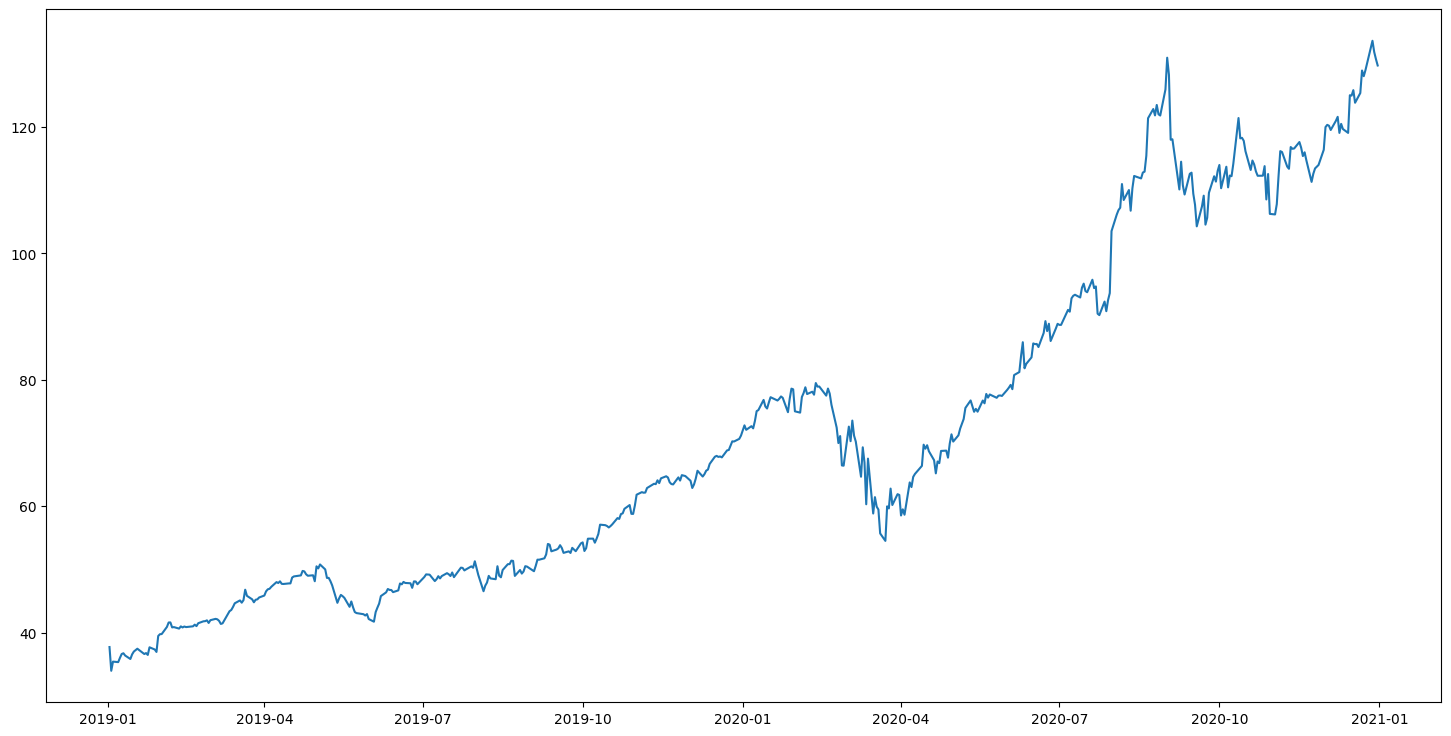

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(df2.index, df2["Close"], linestyle="-")
plt.xlabel=('Días')
plt.ylabel=('')
plt.show();

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df2['Close'],'Close')

Resultados de la prueba de Dickey-Fuller para columna: Close
Test Statistic                          0.319398
p-value                                 0.978217
No Lags Used                            9.000000
Número de observaciones utilizadas    495.000000
Critical Value (1%)                    -3.443630
Critical Value (5%)                    -2.867397
Critical Value (10%)                   -2.569889
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de analisys de Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

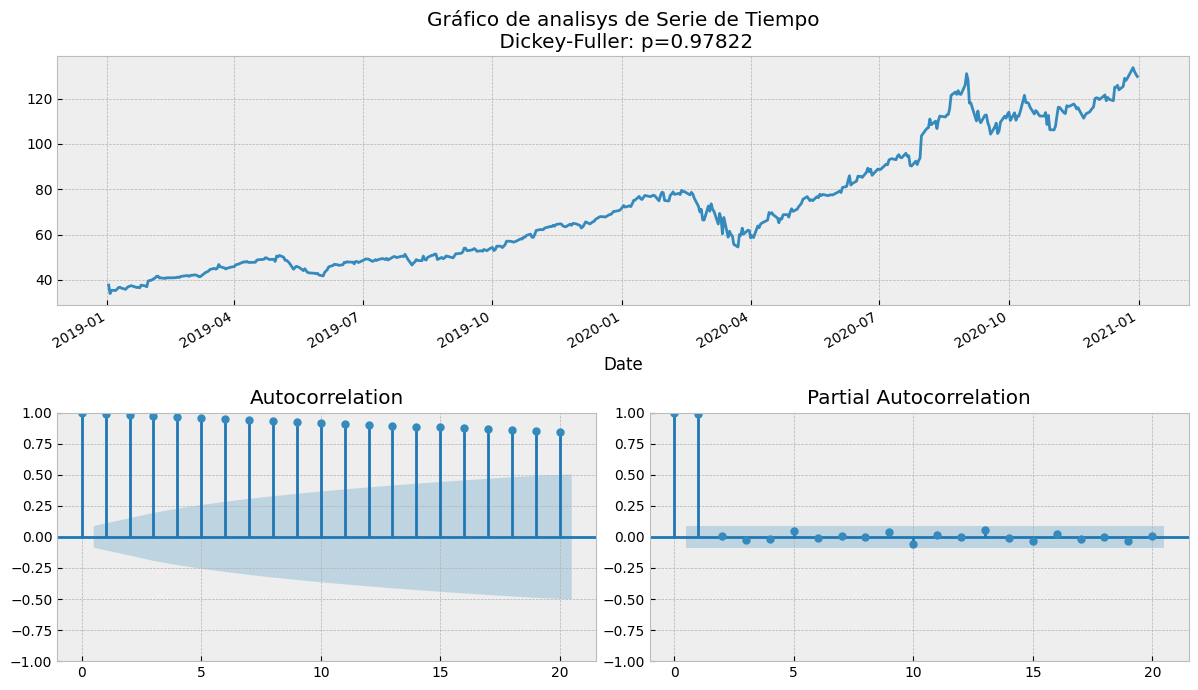

In [ ]:
tsplot(df2["Close"]['AAPL'], lags=20)

Podemos ver que la serie muestra una tendencia, y que requiere ser diferenciada para que la serie sea estacionaria. Por otro lado, la prueba $ADF=0.977$ que es mayor al 5%.

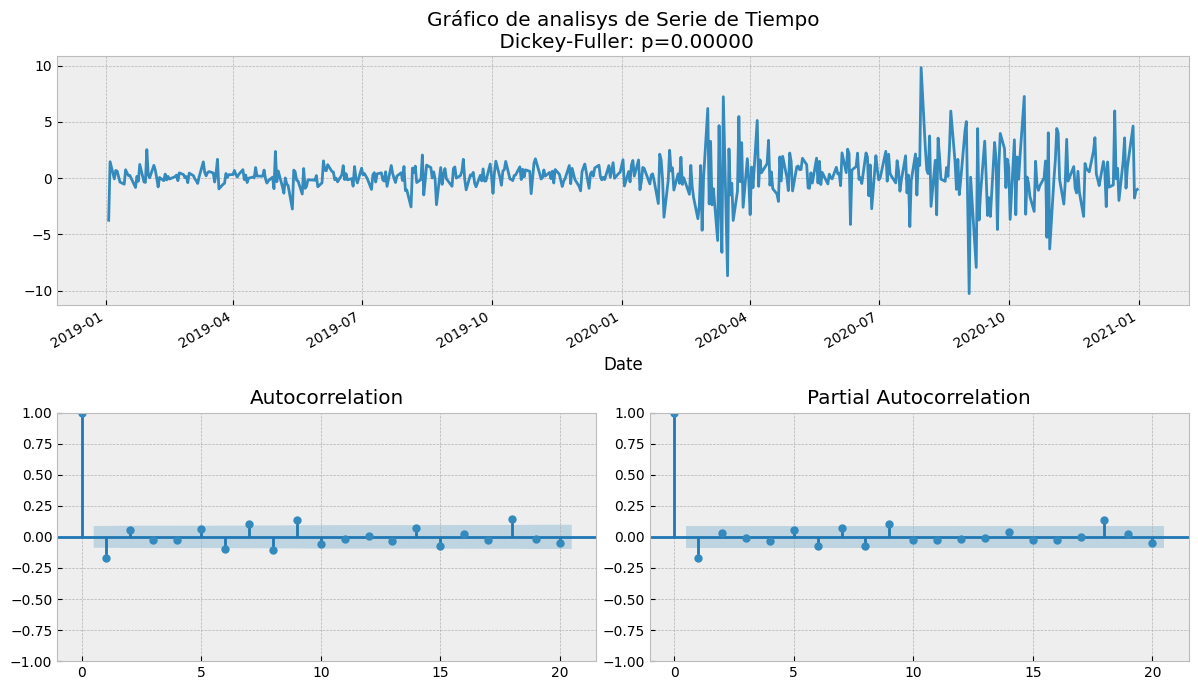

In [ ]:
tsplot(df2["Close"]['AAPL'].diff().dropna(), lags=20)

In [ ]:
Augmented_Dickey_Fuller_Test_func(df2['Close']['AAPL'].diff().dropna(),'Close')

Resultados de la prueba de Dickey-Fuller para columna: Close
Test Statistic                       -7.013875e+00
p-value                               6.811383e-10
No Lags Used                          8.000000e+00
Número de observaciones utilizadas    4.950000e+02
Critical Value (1%)                  -3.443630e+00
Critical Value (5%)                  -2.867397e+00
Critical Value (10%)                 -2.569889e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


Al diferenciar la serie, podemos ver que el ADF=0, es decir, que es menor el 5%, por tanto la serie es **estacionaria**, y por lo tanto el valor de $d=1$.

También podemos ver los gráficos de autocorrelación simple y parcial. Podemos observar el ACF para determinar los término de MA(q)=1.

Y para el gráfico de PACF, se pude ver que el término AR=1.

Esto lo podemos corroborar con la función `AutoArima()`.

In [ ]:
split = int(len(df2.Close.values) * 0.95)
train = df2.Close.iloc[:split]
test = df2.Close.iloc[split:]

In [ ]:
print("Datos original", df2.shape)
print("Datos de entrenamiento", train.shape)
print("Datos de prueba, últimos 30 días", test.shape)
print("Datos de inicio", start)
print("Datos de final",end)

Datos original (505, 5)
Datos de entrenamiento (479, 1)
Datos de prueba, últimos 30 días (26, 1)
Datos de inicio 2019-01-01 00:00:00
Datos de final 2021-01-01 00:00:00


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [ ]:
from pmdarima import auto_arima
auto_arima(train, seasonal=True, m=7,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 7),
      suppress_warnings=True)

train: La serie temporal de entrenamiento sobre la cual se ajustará el modelo.

seasonal=True: Indica que el modelo debe considerar la estacionalidad de los datos.

m=7: El número de períodos en una temporada. En este caso, m=7 sugiere que los datos tienen una estacionalidad semanal, es decir, se repiten cada 7 días.

max_p=7: El parámetro p representa el orden máximo del componente autoregresivo (AR).

max_d=5: El parámetro d representa el grado máximo de diferenciación requerida para hacer estacionaria la serie.
max_q=7: El parámetro q representa el orden máximo del componente de promedio móvil (MA).

max_P=4: El parámetro P representa el orden máximo del componente autoregresivo estacional.

max_D=4: El parámetro D representa el grado máximo de diferenciación estacional.

max_Q=4: El parámetro Q representa el orden máximo del componente de promedio móvil estacional.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA  # Importar desde la nueva ubicación

p = q = range(0, 7)
d = range(0, 3)
pdq = list(itertools.product(p, d, q))
arima_results_aapl = []
for param_set in pdq:
    try:
        arima_aapl = ARIMA(train, order=param_set)
        arima_fitted_aapl = arima_aapl.fit()
        arima_results_aapl.append(arima_fitted_aapl.aic)
    except:
        continue
print('**'*25)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'
      .format(pd.DataFrame(arima_results_aapl)
             .where(pd.DataFrame(arima_results_aapl).T.notnull().all()).min()[0],
             pdq[arima_results_aapl.index(min(arima_results_aapl))]))


**************************************************
The Lowest AIC score is 1923.7638 and the corresponding parameters are (4, 1, 4)


In [ ]:
arima_model = ARIMA(train, order=(4,1,4) ) # p=4, d=1, q=4
arima_result = arima_model.fit()
pred_arima = arima_result.predict(start=len(train),
                                                  end=len(train)\
                                                  + len(test) - 1,
                                                  dynamic=False)


In [ ]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   AAPL   No. Observations:                  479
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -952.882
Date:                Wed, 29 Jan 2025   AIC                           1923.764
Time:                        23:03:41   BIC                           1961.290
Sample:                             0   HQIC                          1938.517
                                - 479                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2350      0.027     -8.564      0.000      -0.289      -0.181
ar.L2          1.1041      0.030     36.638      0.000       1.045       1.163
ar.L3         -0.1247      0.028     -4.531      0.000      -0.179      -0.071
ar.L4         -0.9044      0.027    -33.192      0.000      -0.958      -0.851
ma.L1          0.1461      0.028      5.288      0.000       0.092       0.200
ma.L2         -1.1635      0.028    -41.021      0.000      -1.219      -1.108
ma.L3          0.2179      0.024      9.004      0.000       0.170       0.265
ma.L4          0.9206      0.029     32.148      0.000       0.864       0.977
sigma2         3.1306      0.114     27.455      0.000       2.907       3.354
===================================================================================
Ljung-Box (L1) (Q):                   1.44   Jarque-Bera (JB):               766.35
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               9.08   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_pred = pd.DataFrame(pred_arima)
test_pred_diff=test_pred.diff().dropna()
resultado=pd.DataFrame(test_pred_diff)
resultado.head()

,predicted_mean
480,-1.014218
481,0.467346
482,-0.300234
483,-0.451097
484,0.633519


In [ ]:
test_real = pd.DataFrame(test)
test_real_diff=test_real.diff().dropna()
resultado_real=pd.DataFrame(test_real_diff)
resultado_real.head()

Ticker,AAPL
Date,
2020-11-25,0.840965
2020-11-27,0.547623
2020-11-30,2.405518
2020-12-01,3.588722
2020-12-02,0.352028


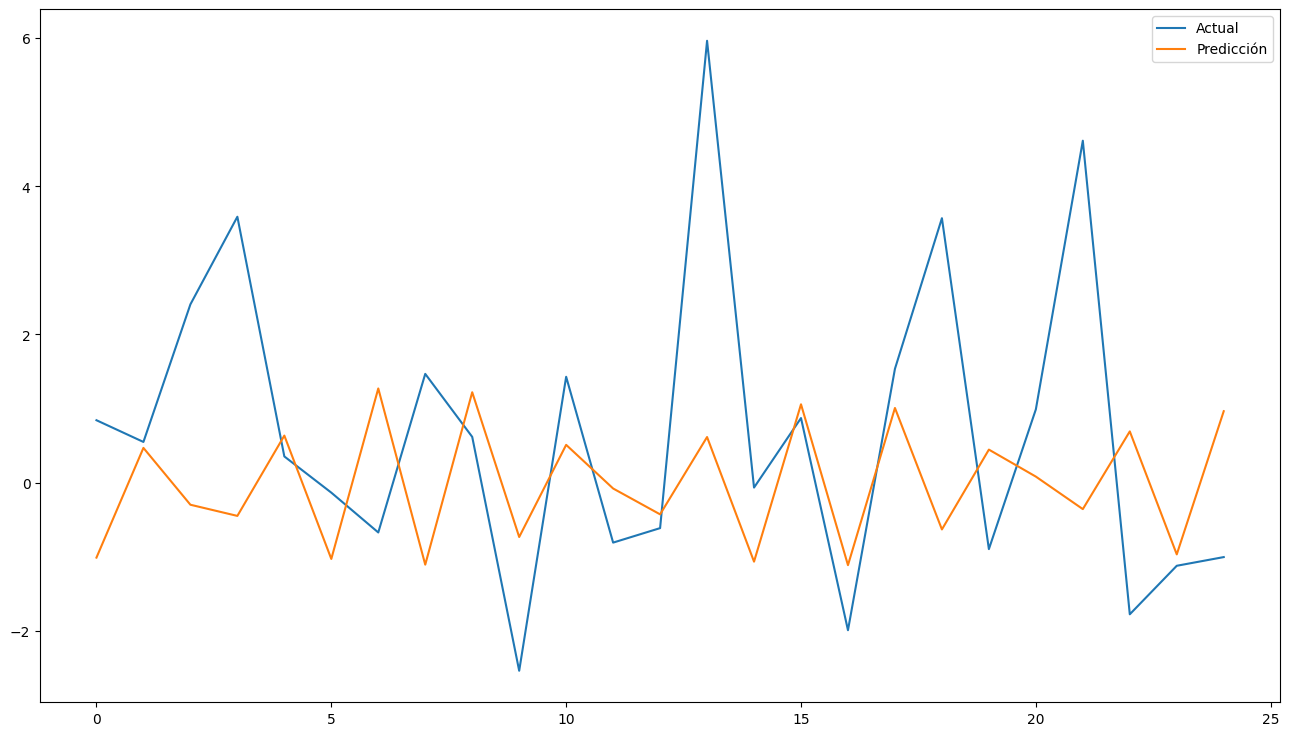

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(resultado_real.values, label="Actual")
plt.plot(resultado.values, label="Predicción")
plt.legend(loc='best')
plt.show();

#DATA & ANALYTICS





Web: www.datayanalytics.com